# K-Pop Project

## Questions of Interest
- What is the most common group member number?
- Overall: How rigorous is the kpop training process?
- What’s the average debut age of an idol (as of 2020?)
- Debut age of South Korean idols vs International?
- Debut age for Big 3 companies vs other companies?
- How many groups are from Big 3, versus other companies, by count?

In [3]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

In [4]:
#importing and defining datasets
df_idols = pd.read_csv('kpop_idols.csv')
df_boyg = pd.read_csv('kpop_idols_boy_groups.csv')
df_girlg = pd.read_csv('kpop_idols_girl_groups.csv')
df_vids = pd.read_csv('kpop_music_videos.csv')

In [5]:
#exploring data
df_idols.head(5)
df_idols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stage Name     1310 non-null   object
 1   Full Name      1304 non-null   object
 2   Korean Name    1304 non-null   object
 3   K. Stage Name  1309 non-null   object
 4   Date of Birth  1310 non-null   object
 5   Group          1219 non-null   object
 6   Country        1310 non-null   object
 7   Birthplace     689 non-null    object
 8   Other Group    122 non-null    object
 9   Gender         1310 non-null   object
dtypes: object(10)
memory usage: 102.5+ KB


In [6]:
df_boyg.head(5)
# rename "Name" column to "Group" as that's what it's titled in the idols dataset to merge datasets
df_boyg.rename(columns = {'Name':'Group'}, inplace = True)

In [7]:
df_girlg.head(5)
df_girlg.rename(columns = {'Name':'Group'}, inplace = True)

,Group,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,2018-05-02,Cube,6,6,NaN,Yes
1,15&,NaN,피프틴앤드,2012-10-05,JYP,2,2,NaN,No
2,2EYES,NaN,투아이즈,2013-07-20,SidusHQ,4,5,NaN,No
3,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
4,3YE,NaN,써드아이,2019-05-21,GH,3,3,NaN,Yes
...,...,...,...,...,...,...,...,...,...
147,We Girls,NaN,위걸스,2018-08-31,Afternoon,8,8,NaN,Yes
148,Weki Meki,WeMe,위키미키,2017-08-08,Fantagio,8,8,NaN,Yes
149,WJSN,Cosmic Girls,우주소녀,2016-02-25,Starship,13,12,Ujung,Yes
150,Wonder Girls,WG,원더걸스,2007-02-13,JYP,4,5,Wonderful,No


In [8]:
df_vids.head(5)
df_vids.info()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release
0,2020-05-22,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major
1,2020-05-21,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major
2,2020-05-21,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major
3,2020-05-20,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major
4,2020-05-20,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major


In [9]:
# merging datasets boy group, girl group, and idols
df_bgs = pd.merge(df_boyg, df_idols, on='Group')
df_bgs.head(5)

,Group,Short,Korean Name_x,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Stage Name,Full Name,Korean Name_y,K. Stage Name,Date of Birth,Country,Birthplace,Other Group,Gender
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Chanyong,Kim Chanyong,김찬용,찬용,1993-04-29,South Korea,Suwon,NaN,M
1,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Hyukjin,Jang Hyukjin,장혁진,혁진,1993-12-20,South Korea,Busan,NaN,M
2,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Jonghwan,Jo Jonghwan,조종환,종환,1992-11-23,South Korea,Seoul,NaN,M
3,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Minwoo,Seo Minwoo,서민우,민우,1985-02-08,South Korea,Daegu,NaN,M
4,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Rokhyun,Kim Rokhyun,김록현,록현,1991-02-10,South Korea,Suncheon,NaN,M
5,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,B.S,Lee Youngsoo,이영수,비에스,1995-04-14,South Korea,NaN,NaN,M
6,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,Dohyuk,Kim Dohyuk,김도혁,도혁,1998-01-16,South Korea,NaN,NaN,M
7,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,E.sol,Jeon Jaehyuk,전재혁,이솔,1992-09-17,South Korea,NaN,NaN,M
8,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,Eunjae,Kwak Eunjae,곽은재,은재,1996-05-02,South Korea,NaN,NaN,M
9,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,Gohyeon,Go Hyeon,고현,고현,1994-10-01,South Korea,NaN,NaN,M


In [10]:
df_ggs = pd.merge(df_idols, df_girlg, on='Group')
df_ggs.head(5)
df_ggs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 380
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stage Name     381 non-null    object
 1   Full Name      376 non-null    object
 2   Korean Name_x  376 non-null    object
 3   K. Stage Name  381 non-null    object
 4   Date of Birth  381 non-null    object
 5   Group          381 non-null    object
 6   Country        381 non-null    object
 7   Birthplace     216 non-null    object
 8   Other Group    30 non-null     object
 9   Gender         381 non-null    object
 10  Short          65 non-null     object
 11  Korean Name_y  381 non-null    object
 12  Debut          381 non-null    object
 13  Company        381 non-null    object
 14  Members        381 non-null    int64 
 15  Orig. Memb.    381 non-null    int64 
 16  Fanclub Name   159 non-null    object
 17  Active         381 non-null    object
dtypes: int64(2), object(16)
memory

In [11]:
#changing data types of variables
df_bgs["Debut"] = pd.to_datetime(df_bgs["Debut"])
df_bgs['Date of Birth'] = pd.to_datetime(df_bgs['Date of Birth']) #changing data type of DoB to date / time
df_bgs = df_bgs.assign(Debut_Age = (df_bgs['Debut'] - df_bgs['Date of Birth']).dt.days) #adding extra col for debut age
df_bgs.head(5)

,Group,Short,Korean Name_x,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Stage Name,Full Name,Korean Name_y,K. Stage Name,Date of Birth,Country,Birthplace,Other Group,Gender,Debut_Age
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Chanyong,Kim Chanyong,김찬용,찬용,1993-04-29,South Korea,Suwon,NaN,M,7082
1,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Hyukjin,Jang Hyukjin,장혁진,혁진,1993-12-20,South Korea,Busan,NaN,M,6847
2,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Jonghwan,Jo Jonghwan,조종환,종환,1992-11-23,South Korea,Seoul,NaN,M,7239
3,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Minwoo,Seo Minwoo,서민우,민우,1985-02-08,South Korea,Daegu,NaN,M,10084
4,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Rokhyun,Kim Rokhyun,김록현,록현,1991-02-10,South Korea,Suncheon,NaN,M,7891


In [12]:
df_ggs["Debut"] = pd.to_datetime(df_ggs["Debut"]) #same thing with girl groups
df_ggs['Date of Birth'] = pd.to_datetime(df_ggs['Date of Birth'])
df_ggs = df_ggs.assign(Debut_Age = (df_ggs['Debut'] - df_ggs['Date of Birth']).dt.days)
df_ggs.head(5)

,Stage Name,Full Name,Korean Name_x,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Short,Korean Name_y,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Debut_Age
0,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,5978
1,Gaeul,Park Gaeul,박가을,가을,1999-05-08,Favorite,South Korea,Seoul,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,6633
2,Jeonghee,Go Jeonghee,고정희,정희,2000-03-11,Favorite,South Korea,Incheon,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,6325
3,Saebom,Kim Seyoung,김세영,새봄,1995-01-13,Favorite,South Korea,Gwacheon,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,8209
4,Seoyeon,Kim Minju,김민주,서연,1995-11-26,Favorite,South Korea,Gwacheon,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,7892


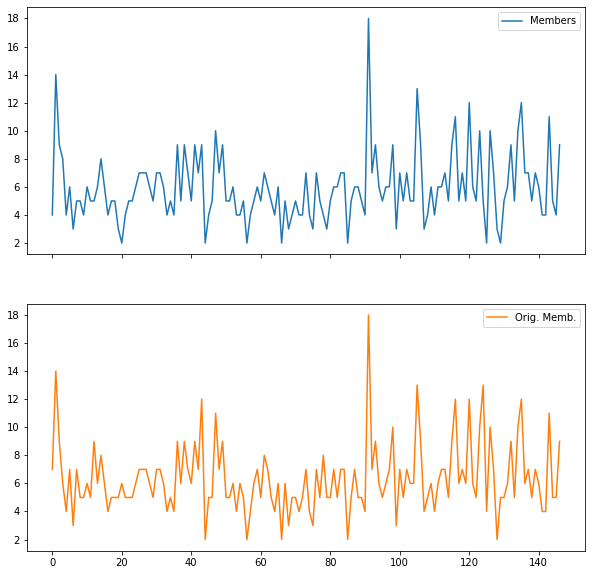

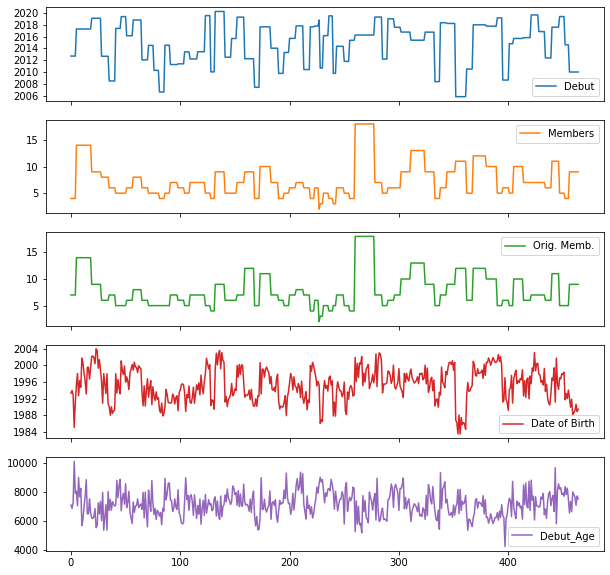

In [13]:
#initial exploration of data comparing original to data with my changes
df_boyg.plot(subplots=True, figsize=(10, 10))
plt.show() #original plot line charts. Default only shows the numbered ones.

df_bgs.plot(subplots=True, figsize=(10, 10))
plt.show() #new data plot has three extra charts because dates data can also be plotted

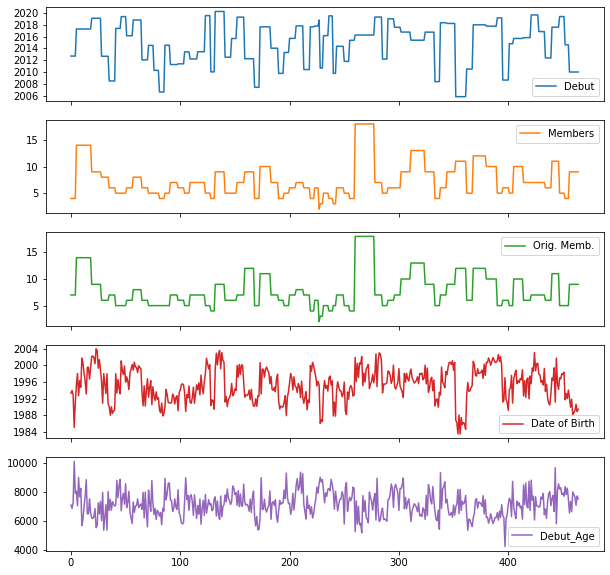

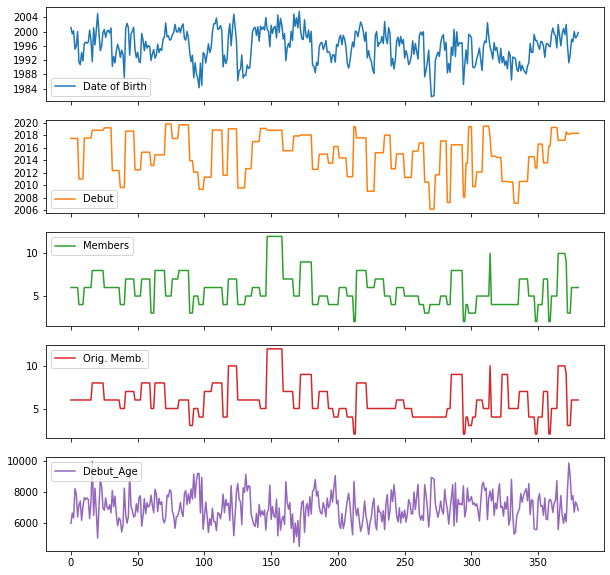

In [14]:
#comparing altered boy group data to altered girl group data
df_bgs.plot(subplots=True, figsize=(10, 10))
df_ggs.plot(subplots=True, figsize=(10, 10))
plt.legend()
plt.show()

## Initial Observations
- There are only 2 'numerial' variables recognised in the original data
- There are 5 in the new one since I converted 2 data types to date, and created a new column based on those

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\4086038499.py:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\4086038499.py:17: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


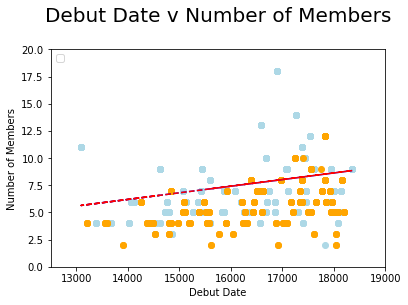

In [15]:
#number of members by debut date boy vs girl groups

x = mdates.date2num(df_bgs['Debut'])
y = df_bgs['Members']
plt.scatter(x, y, color = 'lightblue')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color = 'blue')

#number of members by debut date GIRL GROUPS
a = mdates.date2num(df_ggs['Debut'])
b = df_ggs['Members']
plt.scatter(a, b, color = 'orange')
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(x,q(x),"r--", color = 'red')

plt.gca().set(xlim=(12500,19000), ylim=(0, 20),
              xlabel='Debut Date', ylabel='Number of Members')
plt.axis()
plt.title('Debut Date v Number of Members', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)
plt.show()

## Findings
- There are more members in **boy groups**
- Number of members *increase* as date increased
- The **trend is almost identical** between boy and girl groups -- the later the debut date, the more members there tend to be

In [16]:
#subsetting data by South Korea vs other countries
df_bgs_korea = df_bgs[(df_bgs['Country'] == "South Korea")]
df_bgs_intl = df_bgs[(df_bgs['Country'] != "South Korea")]

df_ggs_korea = df_ggs[(df_ggs['Country'] == "South Korea")]
df_ggs_intl = df_ggs[(df_ggs['Country'] != "South Korea")]
df_ggs_intl.head(5)

,Stage Name,Full Name,Korean Name_x,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Short,Korean Name_y,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Debut_Age
30,Yiren,Wang Yiren,왕이런,이런,2000-12-29,Everglow,China,NaN,NaN,F,NaN,에버글로우,2019-03-18,Yuehua,6,6,NaN,Yes,6653
37,Amber,Amber Josephine Liu,엠버 조세핀 리우,엠버,1992-09-18,f(x),USA,Los Angeles,NaN,F,NaN,에프엑스,2009-08-24,SM,4,5,MeU,No,6184
40,Victoria,Song Qian,송치엔,빅토리아,1987-02-02,f(x),China,Qingdao,NaN,F,NaN,에프엑스,2009-08-24,SM,4,5,MeU,No,8239
44,Miya,Miyauchi Haruka,미야우치 하루카,미야,1993-05-26,GWSN,Japan,NaN,NaN,F,NaN,공원소녀,2018-09-05,Kiwi Pop,7,7,Groo,Yes,9233
47,Soso,Wang Chingyi,왕징이,소소,2001-03-14,GWSN,Taiwan,NaN,NaN,F,NaN,공원소녀,2018-09-05,Kiwi Pop,7,7,Groo,Yes,6384


array([[<AxesSubplot:title={'center':'Date of Birth'}>,
        <AxesSubplot:title={'center':'Debut'}>],
       [<AxesSubplot:title={'center':'Members'}>,
        <AxesSubplot:title={'center':'Orig. Memb.'}>],
       [<AxesSubplot:title={'center':'Debut_Age'}>, <AxesSubplot:>]],
      dtype=object)

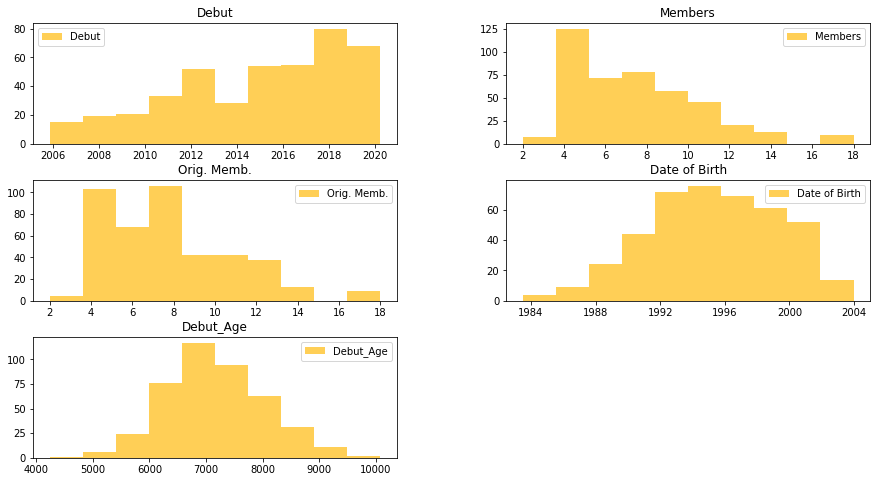

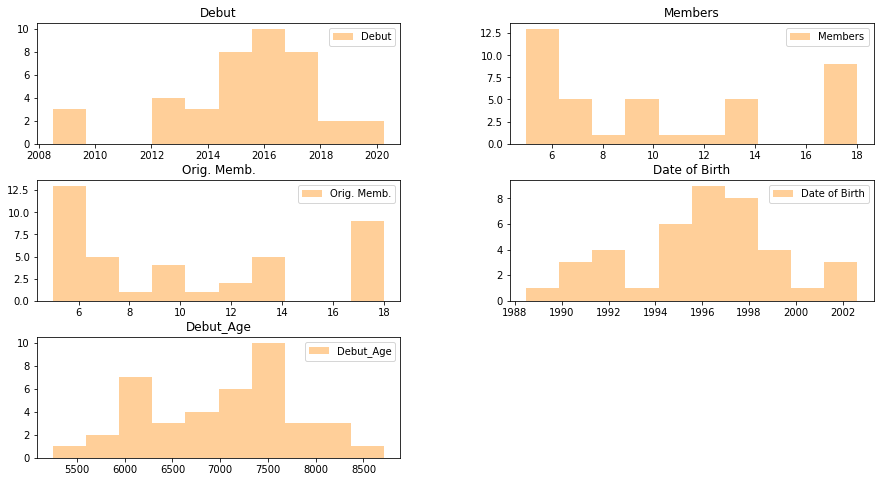

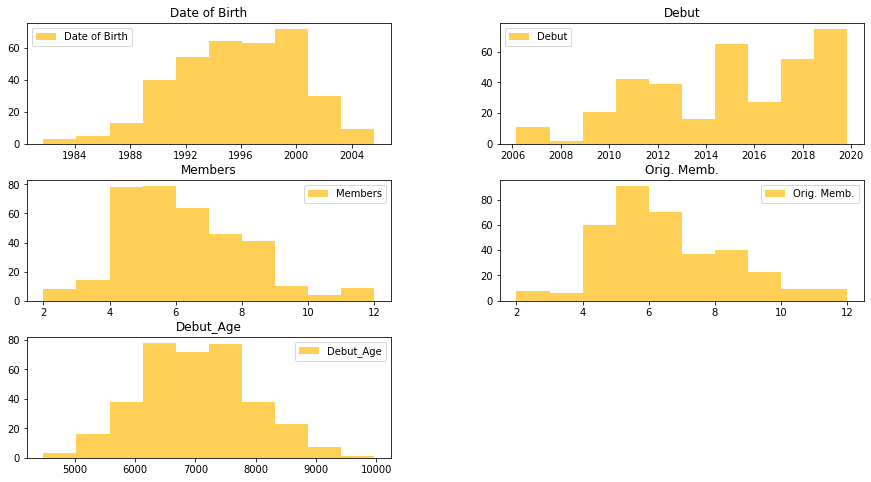

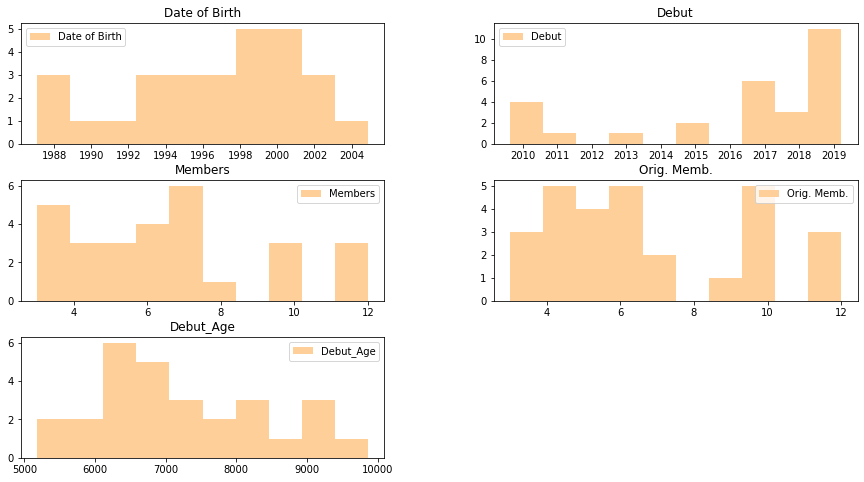

In [17]:
#general exploration of subsetted country data using histograms between both boy and girl groups
df_bgs_korea.hist(grid=False, figsize=(15, 8), legend=True, color='#FFCF56')
df_bgs_intl.hist(grid=False, figsize=(15, 8), legend=True, color='#FFCF99')

df_ggs_korea.hist(grid=False, figsize=(15, 8), legend=True, color='#FFCF56')
df_ggs_intl.hist(grid=False, figsize=(15, 8), legend=True, color='#FFCF99')

## Initial findings
**Boy Groups**
- Most of the trends are the same, except number of original members. South Korean idols are most commonly in groups between 4-6 members, while international idols are either in groups with around 6 or 17 members.
**Girl Groups**
- Once again, the number of members follow different distributions. South Korean girls debuted in group numbers that follow a normal curve, while the international members are in groups with more of a uniform distribution.

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\2267013877.py:8: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\2267013877.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


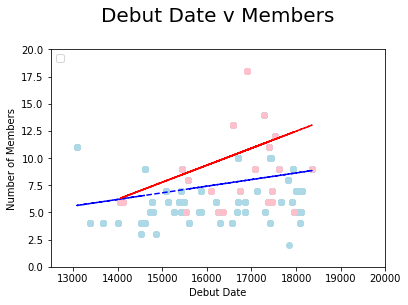

In [18]:
#debut date to members, South Korea vs international (boy groups)

a = mdates.date2num(df_bgs_korea['Debut'])
b = df_bgs_korea['Members']
plt.scatter(a, b, color = "lightblue")
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(x,q(x),"r--", color = "blue")

x = mdates.date2num(df_bgs_intl['Debut'])
y = df_bgs_intl['Members']
plt.scatter(x, y, color = "pink")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color = "red")

plt.gca().set(xlim=(12500,20000), ylim=(0, 20),
              xlabel='Debut Date', ylabel='Number of Members')

plt.axis()
plt.title('Debut Date v Members', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

## Findings
- International groups tend to be in groups with more members
- Companies only started debuting international idols more commonly later on

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\1456326542.py:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\1456326542.py:13: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


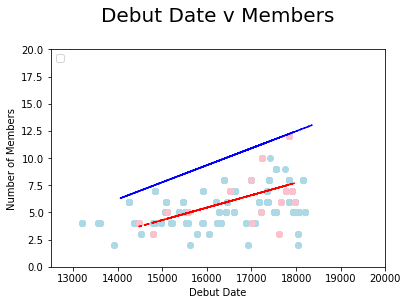

In [19]:
#debut date to members, South Korea vs international (girl groups)
a = mdates.date2num(df_ggs_korea['Debut'])
b = df_ggs_korea['Members']
plt.scatter(a, b, color = "lightblue")
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(x,q(x),"r--", color = "blue")

x = mdates.date2num(df_ggs_intl['Debut'])
y = df_ggs_intl['Members']
plt.scatter(x, y, color = "pink")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color = "red")

plt.gca().set(xlim=(12500,20000), ylim=(0, 20),
              xlabel='Debut Date', ylabel='Number of Members')

plt.axis()
plt.title('Debut Date v Members', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

In [20]:
#subsetting data by Big 3 vs other companies
df_bgs_big3 = df_bgs[(df_bgs['Company'] == "SM") | (df_bgs['Company'] == "JYP") | (df_bgs['Company'] == "YG")]
df_bgs_other = df_bgs[(df_bgs['Company'] != "SM") | (df_bgs['Company'] != "JYP") | (df_bgs['Company'] != "YG")]

df_ggs_big3 = df_ggs[(df_ggs['Company'] == "SM") | (df_ggs['Company'] == "JYP") | (df_ggs['Company'] == "YG")]
df_ggs_other = df_ggs[(df_ggs['Company'] != "SM") | (df_ggs['Company'] != "JYP") | (df_ggs['Company'] != "YG")]
df_ggs_other.head(5)

,Stage Name,Full Name,Korean Name_x,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Short,Korean Name_y,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Debut_Age
0,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,5978
1,Gaeul,Park Gaeul,박가을,가을,1999-05-08,Favorite,South Korea,Seoul,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,6633
2,Jeonghee,Go Jeonghee,고정희,정희,2000-03-11,Favorite,South Korea,Incheon,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,6325
3,Saebom,Kim Seyoung,김세영,새봄,1995-01-13,Favorite,South Korea,Gwacheon,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,8209
4,Seoyeon,Kim Minju,김민주,서연,1995-11-26,Favorite,South Korea,Gwacheon,NaN,F,NaN,페이버릿,2017-07-05,Astory,6,6,NaN,Yes,7892


array([[<AxesSubplot:title={'center':'Date of Birth'}>,
        <AxesSubplot:title={'center':'Debut'}>],
       [<AxesSubplot:title={'center':'Members'}>,
        <AxesSubplot:title={'center':'Orig. Memb.'}>],
       [<AxesSubplot:title={'center':'Debut_Age'}>, <AxesSubplot:>]],
      dtype=object)

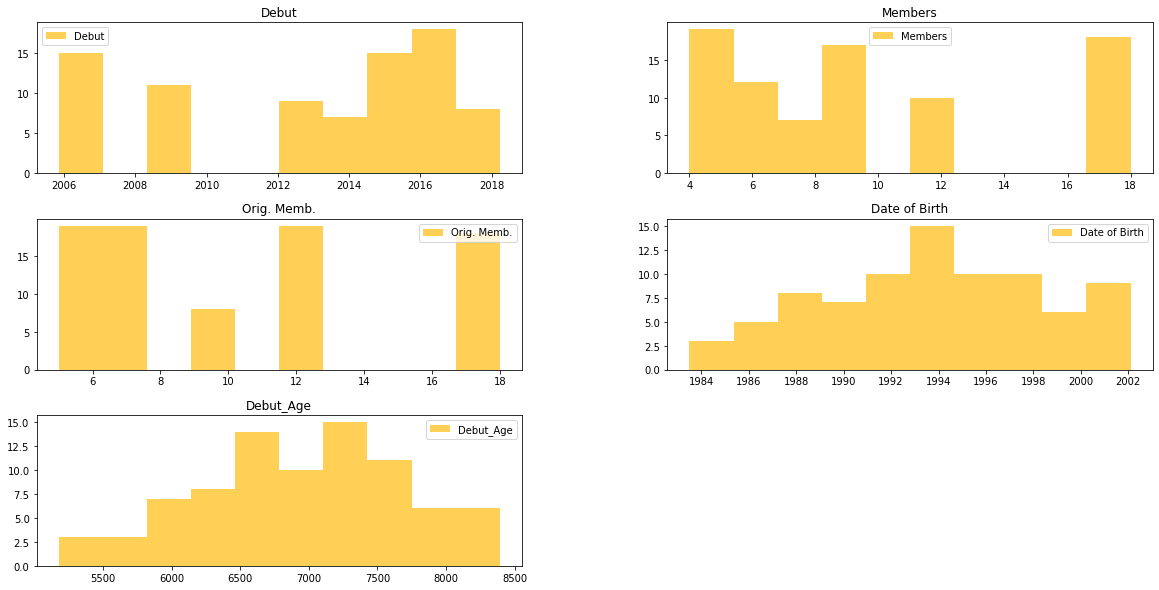

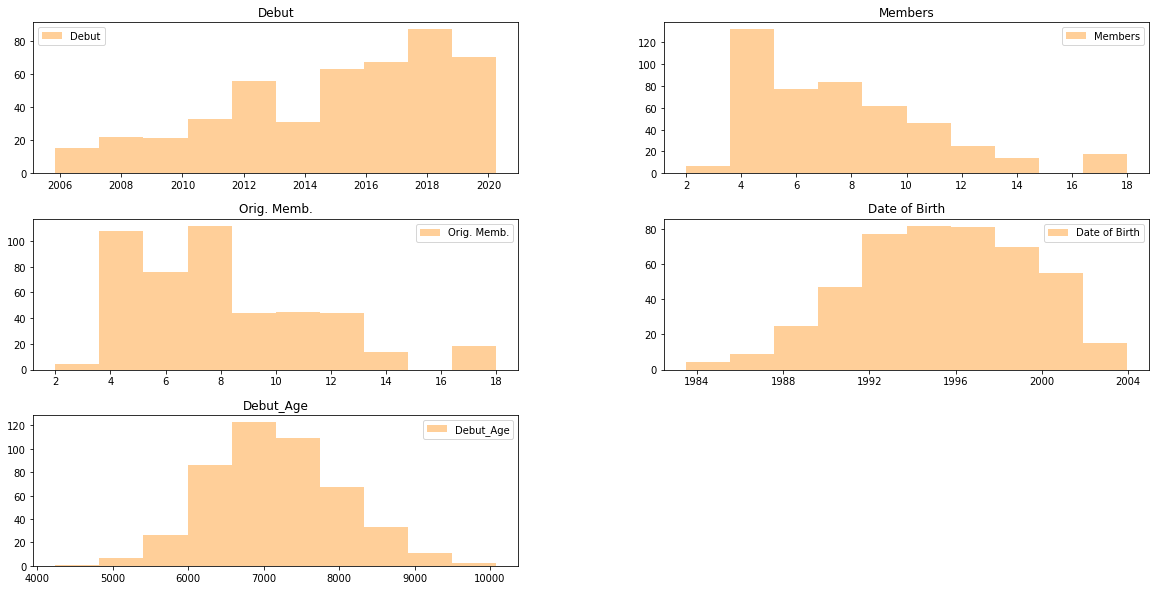

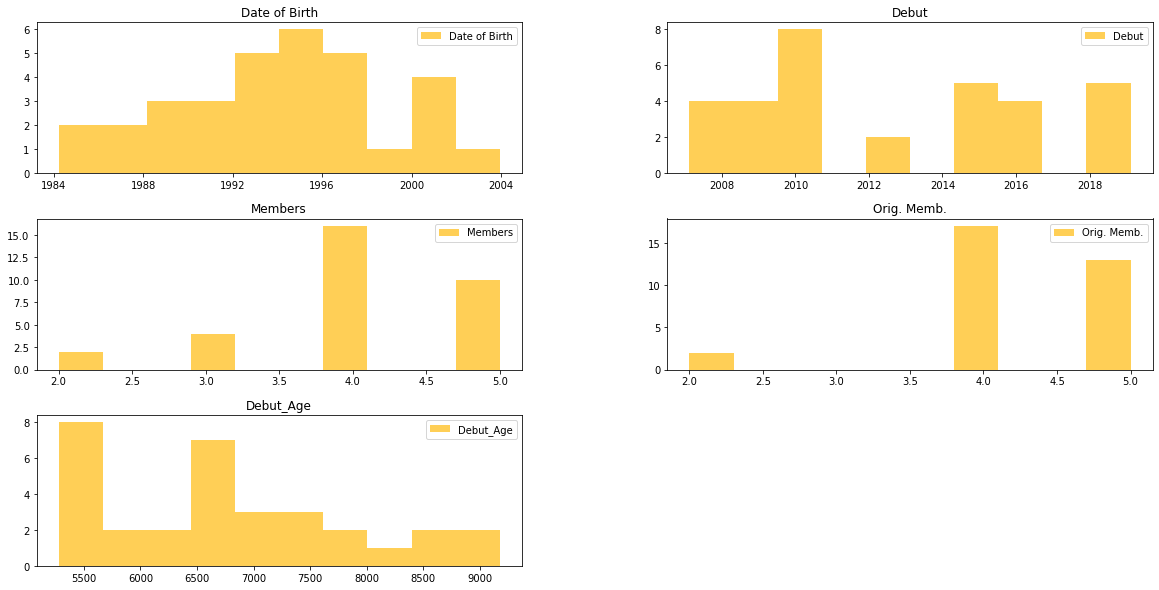

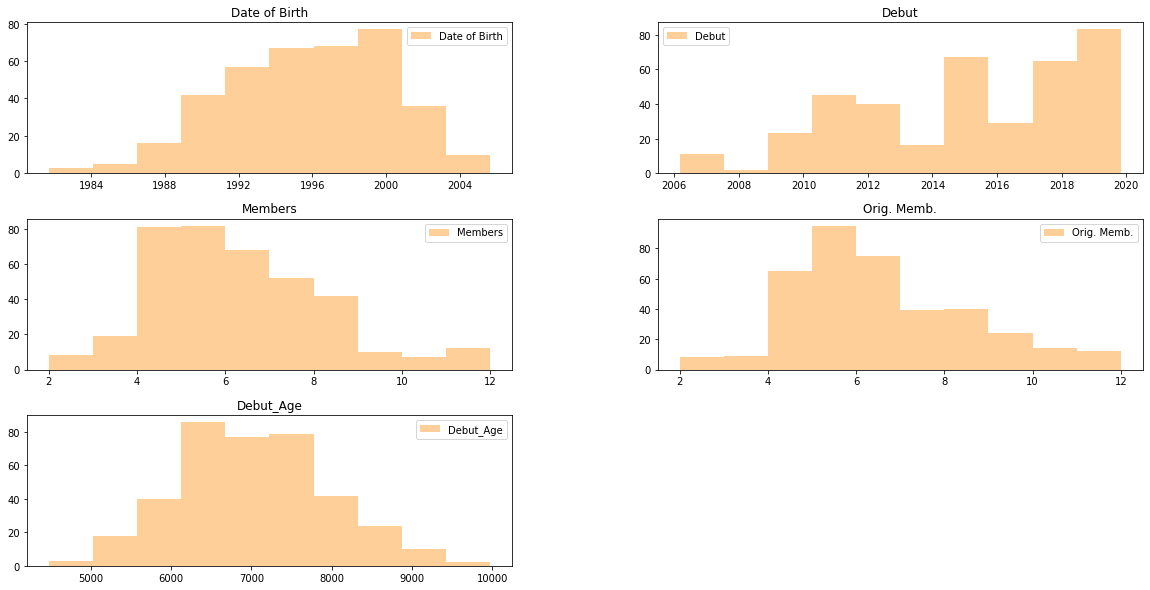

In [21]:
#general exploration in histograms with boy and girl groups by company
df_bgs_big3.hist(grid=False, figsize=(20, 10), legend=True, color='#FFCF56')
df_bgs_other.hist(grid=False, figsize=(20, 10), legend=True, color='#FFCF99')

df_ggs_big3.hist(grid=False, figsize=(20, 10), legend=True, color='#FFCF56')
df_ggs_other.hist(grid=False, figsize=(20, 10), legend=True, color='#FFCF99')

## Findings
**Boy Groups**
- Big 3 companies have gaps between debuting groups, however the number keeps increasing for other companies (more companies are entering the industry)
- Big 3 has a varied number of members, but there is a smoother downward trend for other companies with fewer groups with more members
- Date of birth and debut age follow a normal curve for both company subsets
**Girl Groups**
- Date of birth and debut follow similar distributions
- Members follow a normal curve for other companies, but only have very specific numbers for the Big 3
- Debut age tends towards younger ages for the Big 3, but similar to a normal curve for other companies

In [62]:
#exploring debut age
print("The mean debut age in days for boy group members is " + str(df_bgs['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for girl group members is " + str(df_ggs['Debut_Age'].mean()) + " days.")
print()
print("The mean debut age in days for Big 3 boy group members is " + str(df_bgs_big3['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for non-Big 3 boy group members is " + str(df_bgs_intl['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for Big 3 girl group members is " + str(df_ggs_big3['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for non-Big 3 girl group members is " + str(df_ggs_intl['Debut_Age'].mean()) + " days.")
print()
print("The mean debut age in days for Korean boy group members is " + str(df_bgs_korea['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for International boy group members is " + str(df_bgs_intl['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for Korean girl group members is " + str(df_ggs_korea['Debut_Age'].mean()) + " days.")
print("The mean debut age in days for International girl group members is " + str(df_ggs_intl['Debut_Age'].mean()) + " days.")

The mean debut age in days for boy group members is 7164.843010752688 days.
The mean debut age in days for girl group members is 7029.535433070866 days.

The mean debut age in days for Big 3 boy group members is 6960.277108433735 days.
The mean debut age in days for non-Big 3 boy group members is 7031.0 days.
The mean debut age in days for Big 3 girl group members is 6792.375 days.
The mean debut age in days for non-Big 3 girl group members is 7207.928571428572 days.

The mean debut age in days for Korean boy group members is 7177.44 days.
The mean debut age in days for International boy group members is 7031.0 days.
The mean debut age in days for Korean girl group members is 7015.385269121813 days.
The mean debut age in days for International girl group members is 7207.928571428572 days.


## Findings
**General**
- The average debut age of female idols is slightly lower than male idols
**Boy Groups**
- Average debut age for International idols is younger! This could be due to the smaller sample size.
- Average debut age for Big 3 is younger
**Girl Groups**
- Big 3 girl groups members debut age at a mean age *much* lower than non-Big 3 girl group idols
- South Korean girl groups members debut age at a mean age lower than international girl group idols

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


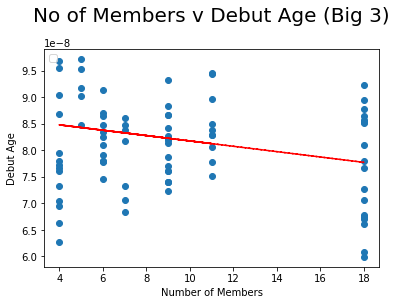

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\990661901.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


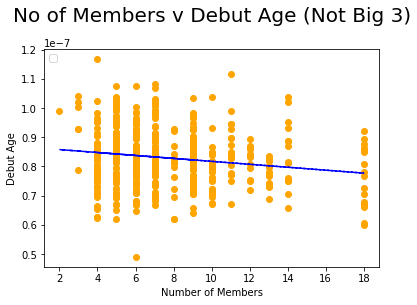

In [75]:
#debut age vs members (boy groups)
a = df_bgs_big3['Members']
b = mdates.date2num(df_bgs_big3['Debut_Age'])
plt.scatter(a, b)
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(a,q(a),"r--")
plt.gca().set(xlabel='Number of Members', ylabel='Debut Age')
plt.axis()
plt.title('No of Members v Debut Age (Big 3)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

x = df_bgs_other['Members']
y = mdates.date2num(df_bgs_other['Debut_Age'])
plt.scatter(x, y, color = 'orange')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color = 'b')

plt.gca().set(xlabel='Number of Members', ylabel='Debut Age')
plt.axis()
plt.title('No of Members v Debut Age (Not Big 3)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

##### Note: we can only look at the trends here. Converting dates so we can run trendlines means the Debut Age magnitudes are redundant.

## Findings
- All companies follow a similar, slightly downward trend
- Average debut age is lower for a higher number of members, likely because if there are more members, there are more likely to allow for younger members to debut

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\1433316060.py:7: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


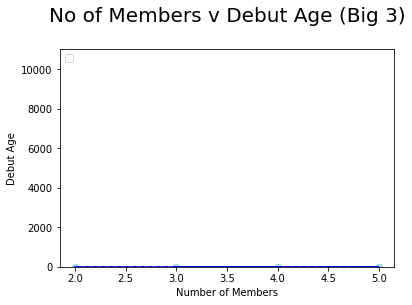

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\1433316060.py:21: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


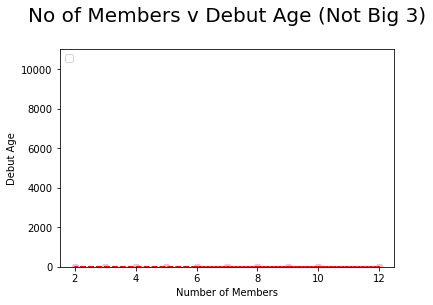

In [76]:
#debut age vs members (girl groups)
a = df_ggs_big3['Members']
b = mdates.date2num(df_ggs_big3['Debut_Age'])
plt.scatter(a, b, color = 'lightblue')
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(a,q(a),"r--", color = 'blue')
plt.gca().set(ylim=(0, 11000),
              xlabel='Number of Members', ylabel='Debut Age')
plt.axis()
plt.title('No of Members v Debut Age (Big 3)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

x = df_ggs_other['Members']
y = mdates.date2num(df_ggs_other['Debut_Age'])
plt.scatter(x, y, color = 'pink')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color = 'red')

plt.gca().set(ylim=(0, 11000),
              xlabel='Number of Members', ylabel='Debut Age')
plt.axis()
plt.title('No of Members v Debut Age (Not Big 3)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

## Findings
- There is a *slightly more downward trend* for non-Big 3 companies, though both follow a downward trend
- Female idols are more likely to debut at a younger age in larger groups at non-Big 3 companies
- This could be due to the small sample of girl groups in the Big 3 causing skewed results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


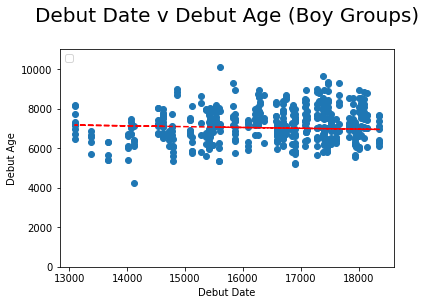

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\3197186714.py:21: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


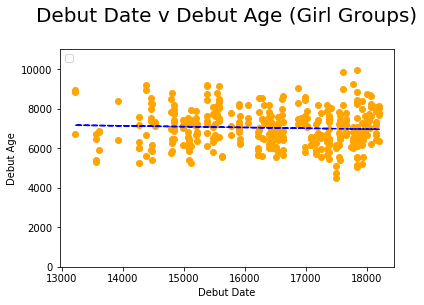

In [83]:
#debut age vs time (boy groups vs girl groups)
a = mdates.date2num(df_bgs['Debut'])
b = df_bgs['Debut_Age']
plt.scatter(a, b)
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(a,q(a),"r--")
plt.gca().set(ylim=(0, 11000),
              xlabel='Debut Date', ylabel='Debut Age')
plt.axis()
plt.title('Debut Date v Debut Age (Boy Groups)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

x = mdates.date2num(df_ggs['Debut'])
y = df_ggs['Debut_Age']
plt.scatter(x, y, color = 'orange')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color = 'b')

plt.gca().set(ylim=(0, 11000),
              xlabel='Debut Date', ylabel='Debut Age')
plt.axis()
plt.title('Debut Date v Debut Age (Girl Groups)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

## Findings
- Boy and girl groups both have a downward-sloping trendline, but this is almost insignificant
- It is likely that **debut date and age are unrelated** when comparing girl and boy groups

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\668229747.py:7: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\chris\AppData\Local\Temp\ipykernel_2604\668229747.py:19: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


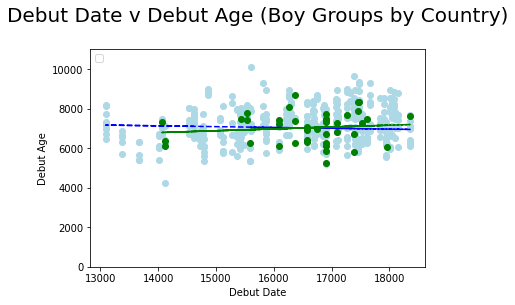

In [29]:
#debut age vs debut date (boy groups, by country)
a = mdates.date2num(df_bgs_korea['Debut'])
b = df_bgs_korea['Debut_Age']
plt.scatter(a, b, color = 'lightblue')
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(a,q(a),"r--", color = 'blue')
plt.gca().set(ylim=(0, 11000),
              xlabel='Debut Date', ylabel='Debut Age')
plt.axis()
plt.title('Debut Date v Debut Age (Korea)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

x = mdates.date2num(df_bgs_intl['Debut'])
y = df_bgs_intl['Debut_Age']
plt.scatter(x, y, color = 'green')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color = 'green')

plt.gca().set(ylim=(0, 11000),
              xlabel='Debut Date', ylabel='Debut Age')
plt.axis()
plt.title('Debut Date v Debut Age (Boy Groups by Country)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

## Findings
- There is a *slight downward trend* for South Korean boy groups, but a slight upward trend for international members
- This means that as time passes, South Korean boy groups idols debut at earlier ages, while international boy group members debut at slightly older ages

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\86761041.py:7: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

C:\Users\chris\AppData\Local\Temp\ipykernel_2604\86761041.py:16: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


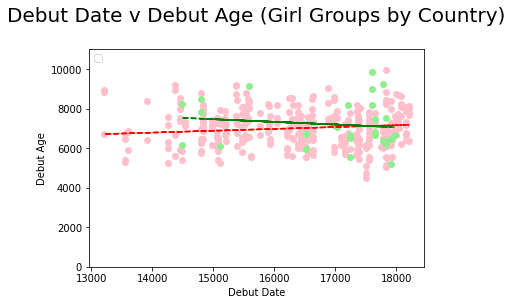

In [30]:
#debut age vs debut date (girl groups)
a = mdates.date2num(df_ggs_korea['Debut'])
b = df_ggs_korea['Debut_Age']
plt.scatter(a, b, color = 'pink')
c = np.polyfit(a, b, 1)
q = np.poly1d(z)
plt.plot(a,q(a),"r--", color = 'red')
plt.gca().set(ylim=(0, 11000),
              xlabel='Debut Date', ylabel='Debut Age')

x = mdates.date2num(df_ggs_intl['Debut'])
y = df_ggs_intl['Debut_Age']
plt.scatter(x, y, color = 'lightgreen')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", color = 'green')

plt.gca().set(ylim=(0, 11000),
              xlabel='Debut Date', ylabel='Debut Age')
plt.axis()
plt.title('Debut Date v Debut Age (Girl Groups by Country)', y=1.1, fontdict={'fontsize':20}, backgroundcolor='w', color='black')
plt.legend(loc=2)

plt.show()

## Findings
- There is a upward trend for South Korean idols, and an downward trend for international girl groups
- International idols are debuting at younger ages as time goes on, while domestic idols are debuting at higher ages
- These trends are the opposite to boy groups

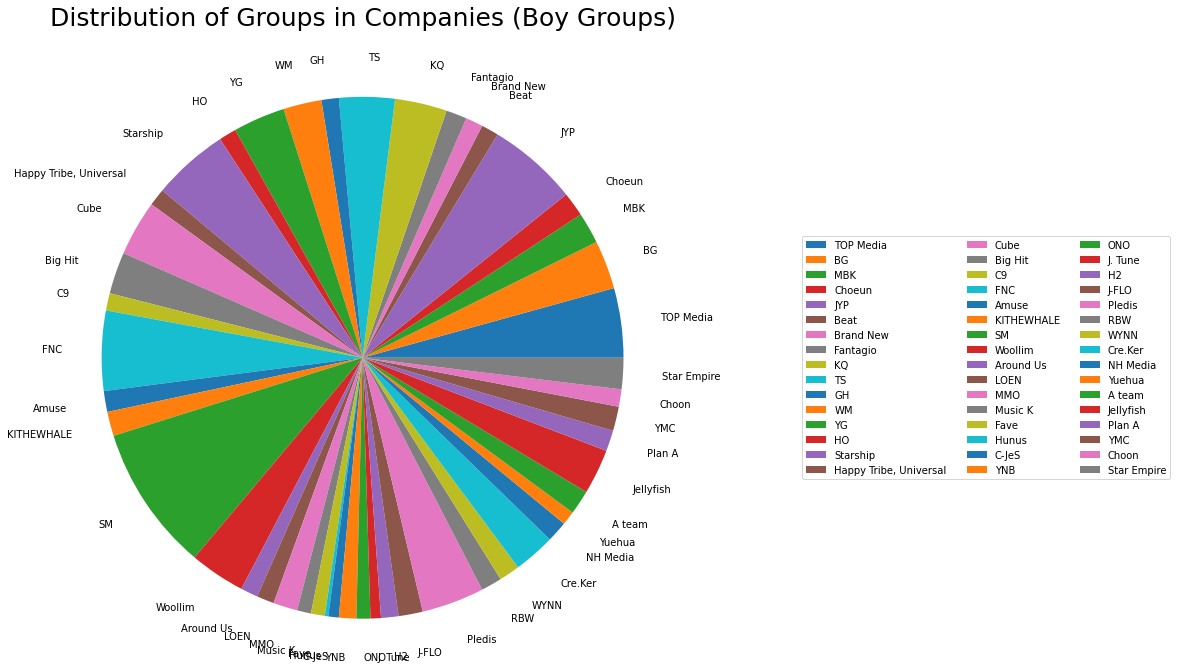

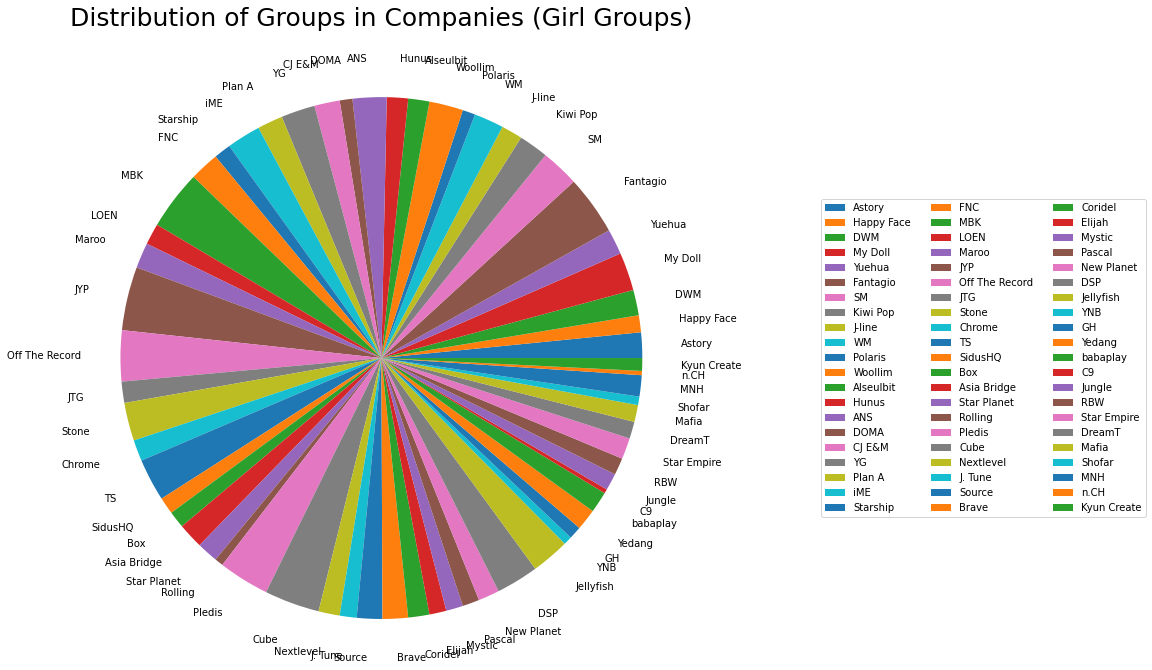

In [38]:
#pie chart to see distribution of number of groups by company
plt.pie(df_bgs['Company'].value_counts(sort=False), labels = df_bgs['Company'].str.split(';\s*', expand=True).stack().unique(), radius=3, labeldistance=1.15)
plt.title("Distribution of Groups in Companies (Boy Groups)", fontsize = 25, y=2.0, backgroundcolor='w', color='black')

plt.legend(loc='center left', bbox_to_anchor=(2.5, 0.5), ncol=3)
plt.show()

plt.pie(df_ggs['Company'].value_counts(sort=False), labels = df_ggs['Company'].str.split(';\s*', expand=True).stack().unique(), radius=3, labeldistance=1.15)
plt.title("Distribution of Groups in Companies (Girl Groups)", fontsize = 25, y=2.0, backgroundcolor='w', color='black')
plt.legend(loc='center left', bbox_to_anchor=(2.5, 0.5), ncol=3)
plt.show()

## Findings
- There are more boy than girl groups in Big 3 companies, such as in SM, JYP, and YG
- It is more distributed evenly among companies for girl groups
- Would be interesting to look at market share and compare to these proportions for companies

# Next Steps
- Look into what the market share is for companies and compare it to proportion of groups in the industry
- Examine whether larger groups are more successful
- Generate links based on if people want to watch a new video from a boy/girl group or soloist if they become interested in the groups after examining the dataset